In [1]:
# Preprocessing
import datetime

# Computations
import numpy as np
import pandas as pd
from scipy.stats import norm

# Train and Test sets splitting
from sklearn.model_selection import train_test_split

# Text Colors
from colorama import Fore, Back, Style

# Regressors
import sklearn
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import mplleaflet
from shapely.geometry import Point, Polygon

# Maps
import folium
from folium import plugins
from folium.plugins import HeatMap

# Plots

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon
import matplotlib.gridspec as gridspec

# sns setting
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":14,"axes.labelsize":12})
sns.set_style("whitegrid")

# plt setting
plt.style.use('seaborn-whitegrid')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### Table of Contents

* [Dataset](#Dataset)
	* [Data Description from Kaggle](#Data-Description-from-Kaggle)
	* [Data Columns](#Data-Columns)
	* [The number of NaN values in each columns](#The-number-of-NaN-values-in-each-columns)
	* [Data Type in each column](#Data-Type-in-each-column)
* [Data Exploration](#Data-Exploration)
     * [Year 2014: The relationship between various attributes and the price](#Year-2014:-The-relationship-between-various-attributes-and-the-price)
     * [Year 2014: Average Price (Living Space)](#Year-2014:-Average-Price-(Living-Space))
     * [Year 2014: Average Price (Lot Space)](#Year-2014:-Average-Price-(Lot-Space))
     * [Year 2014: Average Price (Bedrooms and Bathrooms)](#Year-2014:-Average-Price-(Bedrooms-and-Bathrooms))
     * [Year 2014: Average Price (Grade and Condition)](#Year-2014:-Average-Price-(Grade-and-Condition))
     * [Year 2014: Price and Location](#Year-2014:-Price-and-Location)
     * [Year 2014: The top ten expensive houses](#Year-2014:-The-top-ten-expensive-houses)
     * [Year 2015: The relationship between various attributes and the price](#Year-2015:-The-relationship-between-various-attributes-and-the-price)
     * [Year 2015: Average Price (Living Space)](#Year-2015:-Average-Price-(Living-Space))
     * [Year 2015: Average Price (Lot Space)](#Year-2015:-Average-Price-(Lot-Space))
     * [Year 2015: Average Price (Bedrooms and Bathrooms)](#Year-2015:-Average-Price-(Bedrooms-and-Bathrooms))
     * [Year 2015: Average Price (Grade and Condition)](#Year-2015:-Average-Price-(Grade-and-Condition))
     * [Year 2015: Price and Location](#Year-2015:-Price-and-Location)
     * [Year 2015: The top ten expensive houses](#Year-2015:-The-top-ten-expensive-houses)
* [Predictions](#Predictions)
	* [Train and Test Sets](#Train-and-Test-Sets)
	* [Gradient Boosted Tree](#Gradient-Boosted-Tree)
	* [Decision Tree Regression](#Decision-Tree-Regression)
* [Conclusions](#Conclusions)

# Dataset

In this study, we use a dataset from [Kaggle.com](https://www.kaggle.com/shivachandel/kc-house-data).


### Data Description from Kaggle

Online property companies offer valuations of houses using machine learning techniques. This report aims to predict house sales in King County, Washington State, USA using Multiple Linear Regression (MLR). The dataset consisted of historic data of houses sold between May 2014 to May 2015. We will predict the sales of houses in King County with an accuracy of at least 75-80% and understand which factors are responsible for higher property value - $650K and above.”
The dataset consists of house prices from King County an area in the US State of Washington, this data also covers Seattle. The dataset was obtained from Kaggle*. This data was published/released under CC0*: Public Domain. Unfortunately, the user has not indicated the source of the data. Please find the citation and database description in the Glossary and Bibliography. The dataset consisted of 21 variables and 21613 observations.

### Data Columns
Attribute Information (in order):
	
| Attribute | Information | Attribute | Information |
|-------------|------------------------------------|---------------|----------------------------------------------------------------|
| id | Identification number of the house | grade | Grade given to the house |
| date | Date of the aquired information | sqft_above | The square footage of the up part of the house |
| price | Price of the house | sqft_basement | The square footage of the basement |
| bedrooms | The number of bedrooms in a house | yr_built | Built year |
| bathrooms | The number of bathrooms in a house | yr_renovated | The last renovation year |
| sqft_living | Square footage of the living area | zipcode | Zipcode |
| sqft_lot | Square footage of the lot area | lat | Latitude of the house |
| floors | The number of floors in the house | long | Longitude of the house |
| waterfront | If it has water front | sqft_living15 | The square footage of the living area of the 15 nearest houses |
| view | If it has view | sqft_lot15 | The square footage of the lot area of the 15 nearest houses |
| condition | Condition of the house |  |  |

Creating a dictionary for later analysis:

In [2]:
Dict = {'id':'Identification number of the house',
        'date':'Date of the aquired information',
        'price':'Price of the house',
        'bedrooms':'The number of bedrooms in a house',
        'bathrooms':'The number of bathrooms in a house',
        'sqft_living':'Square footage of the living area',
        'sqft_lot':'Square footage of the lot area',
        'floors':'The number of floors in the house',
        'waterfront':'If it has water front',
        'view':'If it has view',
        'condition':'Condition of the house',
        'Attribute':'Information',
        'grade':'Grade given to the house',
        'sqft_above':'The square footage of the up part of the house',
        'sqft_basement':'The square footage of the basement',
        'yr_built':'Built year',
        'yr_renovated':'The last renovation year',
        'zipcode':'Zipcode',
        'lat':'Latitude of the house',
        'long':'Longitude of the house',
        'sqft_living15':'The square footage of the living area of the 15 nearest houses',
        'sqft_lot15':'The square footage of the lot area of the 15 nearest houses'}

In [3]:
Data = pd.read_csv('Data/kc_house_data.csv')
Data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7      1180.0              0   
1      7242     2.0           0     0  ...      7      2170.0            400   
2     10000     1.0           0     0  ...      6       770.0              0   
3      5000     1.0           0     0  ...      7      1050.0            910   
4      8080     1.0           0     0  ...      8      1680.0              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [4]:
Data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21611.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.396095     291.509045   1971.005136     84.402258   
std        1.175459    828.128162     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

### The number of NaN values in each columns

In [5]:
def Data_info(Inp, Only_NaN = False):
    Out = pd.DataFrame(Inp.dtypes,columns=['Data Type']).sort_values(by=['Data Type'])
    Out = Out.join(pd.DataFrame(Inp.isnull().sum(), columns=['Number of NaN Values']), how='outer')
    Out['Percentage'] = np.round(100*(Out['Number of NaN Values']/Inp.shape[0]),2)
    if Only_NaN:
        Out = Out.loc[Out['Number of NaN Values']>0]
    return Out

In [6]:
Data_info(Data)

Data Type  Number of NaN Values  Percentage
bathrooms       float64                     0        0.00
bedrooms          int64                     0        0.00
condition         int64                     0        0.00
date             object                     0        0.00
floors          float64                     0        0.00
grade             int64                     0        0.00
id                int64                     0        0.00
lat             float64                     0        0.00
long            float64                     0        0.00
price           float64                     0        0.00
sqft_above      float64                     2        0.01
sqft_basement     int64                     0        0.00
sqft_living       int64                     0        0.00
sqft_living15     int64                     0        0.00
sqft_lot          int64                     0        0.00
sqft_lot15        int64                     0        0.00
view              int64                     0        0.00
waterfront        int64                     0        0.00
yr_built          int64                     0        0.00
yr_renovated      int64                     0        0.00
zipcode           int64                     0        0.00

We only have 2 **NaN** values in **sqft_above** columns. Thus,

In [7]:
mylist = np.where(np.isnan(Data['sqft_above']))
mylist = mylist[0].tolist()

In [8]:
Data.iloc[mylist,:]

id             date     price  bedrooms  bathrooms  sqft_living  \
10  1736800520  20150403T000000  662500.0         3        2.5         3560   
17  6865200140  20140529T000000  485000.0         4        1.0         1600   

    sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
10      9796     1.0           0     0  ...      8         NaN           1700   
17      4300     1.5           0     0  ...      7         NaN              0   

    yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
10      1965             0    98007  47.6007 -122.145           2210   
17      1916             0    98103  47.6648 -122.343           1610   

    sqft_lot15  
10        8925  
17        4300  

[2 rows x 21 columns]

We can see that these listings have less than two floors and sqft above can be regarded as zero.

In [9]:
Data.loc[mylist,'sqft_above']=0

Moreover, we can see that some of the entries have zero as the renovation year. These entires haven't had any renovations apparently.

In [10]:
Data.yr_renovated.unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944], dtype=int64)

### Data Type in each column

In [11]:
Data_info(Data)

Data Type  Number of NaN Values  Percentage
bathrooms       float64                     0         0.0
bedrooms          int64                     0         0.0
condition         int64                     0         0.0
date             object                     0         0.0
floors          float64                     0         0.0
grade             int64                     0         0.0
id                int64                     0         0.0
lat             float64                     0         0.0
long            float64                     0         0.0
price           float64                     0         0.0
sqft_above      float64                     0         0.0
sqft_basement     int64                     0         0.0
sqft_living       int64                     0         0.0
sqft_living15     int64                     0         0.0
sqft_lot          int64                     0         0.0
sqft_lot15        int64                     0         0.0
view              int64                     0         0.0
waterfront        int64                     0         0.0
yr_built          int64                     0         0.0
yr_renovated      int64                     0         0.0
zipcode           int64                     0         0.0

Moreover, it can be seen that **object** column has **object** values and we can convert these values to **data time** values

In [12]:
Data['date'] = Data['date'].apply(lambda x: x[:4]+'/'+x[4:6]+'/'+x[6:8])
Data['date'] = pd.to_datetime(Data.date, format='%Y/%m/%d')

and, adding another column for years

In [13]:
Data.insert(2, 'year', pd.DatetimeIndex(Data.date).year)

We have,

In [14]:
Data.head()

id       date  year     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  2014  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  2014  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  2015  180000.0         2       1.00          770   
3  2487200875 2014-12-09  2014  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0  ...      7      1180.0              0   
1      7242     2.0           0  ...      7      2170.0            400   
2     10000     1.0           0  ...      6       770.0              0   
3      5000     1.0           0  ...      7      1050.0            910   
4      8080     1.0           0  ...      8      1680.0              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 22 columns]

# Data Exploration

First of all, 

In [15]:
mylist = Data.year.unique().tolist()
mylist

[2014, 2015]

Our data has the price and other information for two years, 2014 and 2015. We can create two separate data frame for our analysis.

In [16]:
Y14 = Data[Data.year == mylist[0]]
Y15 = Data[Data.year == mylist[1]]

First, let's explore **Y14**.

In [17]:
Y14.head().style.hide_index()

## Year 2014: The relationship between various attributes and the price

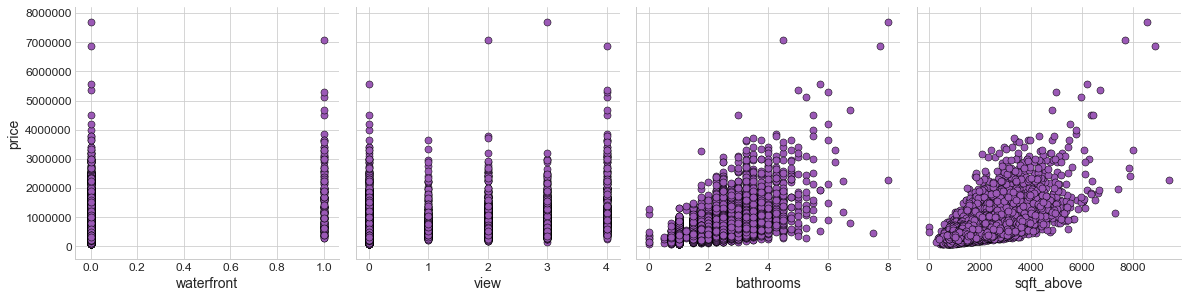

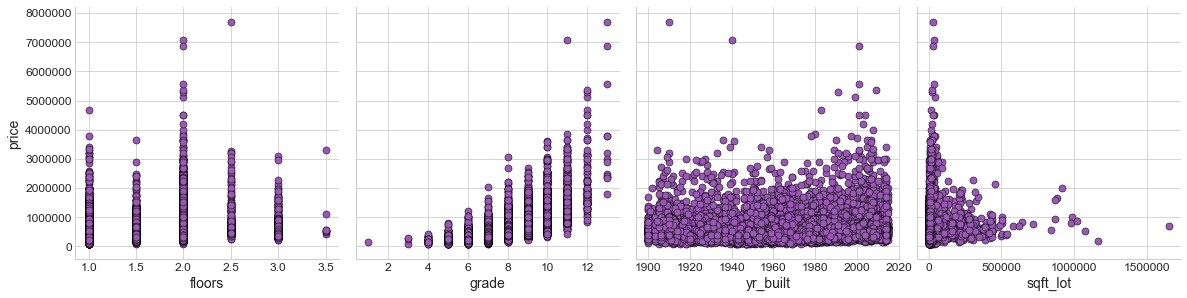

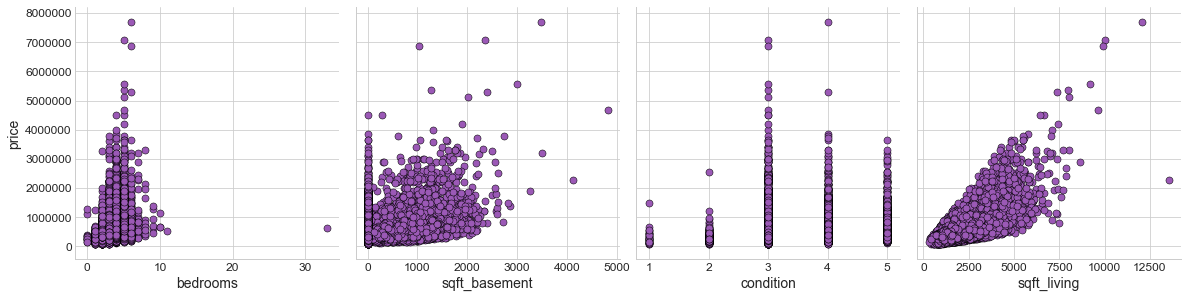

In [18]:
Temp = Y14.iloc[:, 3 : 17]
mylist = list(set(Temp)-set(['price','yr_renovated']))
ind = np.arange(0,len(mylist), 4).tolist()
ind.append(len(mylist))

for i in range(len(ind)-1):
    _ = sns.pairplot(data= Data, y_vars = ['price'], x_vars = mylist[ind[i]:ind[i+1]], size=4,
                 height=4, plot_kws=dict(s=50, color='#9b59b6', edgecolor="k", linewidth=0.5),diag_kws=dict(shade=True))

## Year 2014: Average Price (Living Space)

In [19]:
Group = pd.DataFrame(Y14.groupby(['sqft_living'])['price'].mean())
Group.columns = ['Average Price']
Group.sort_values(by='sqft_living', inplace = True)
Top = 10
print(Back.CYAN +'Top %i entries:' % Top)
display(Group.head(Top).T)
print(Back.CYAN +'Bottom %i entries:' % Top)
display(Group.tail(Top).T)

Top 10 entries:


sqft_living         290       370       380       384       390       420  \
Average Price  142000.0  276000.0  245000.0  265000.0  228000.0  280000.0   

sqft_living        430       440       460       470  
Average Price  80000.0  290000.0  247000.0  192500.0

Bottom 10 entries:


sqft_living        7710       8010       8020       8670       9200   \
Average Price  3300000.0  5110800.0  3300000.0  2888000.0  5570000.0   

sqft_living        9640       9890       10040      12050      13540  
Average Price  4668000.0  6885000.0  7062500.0  7700000.0  2280000.0

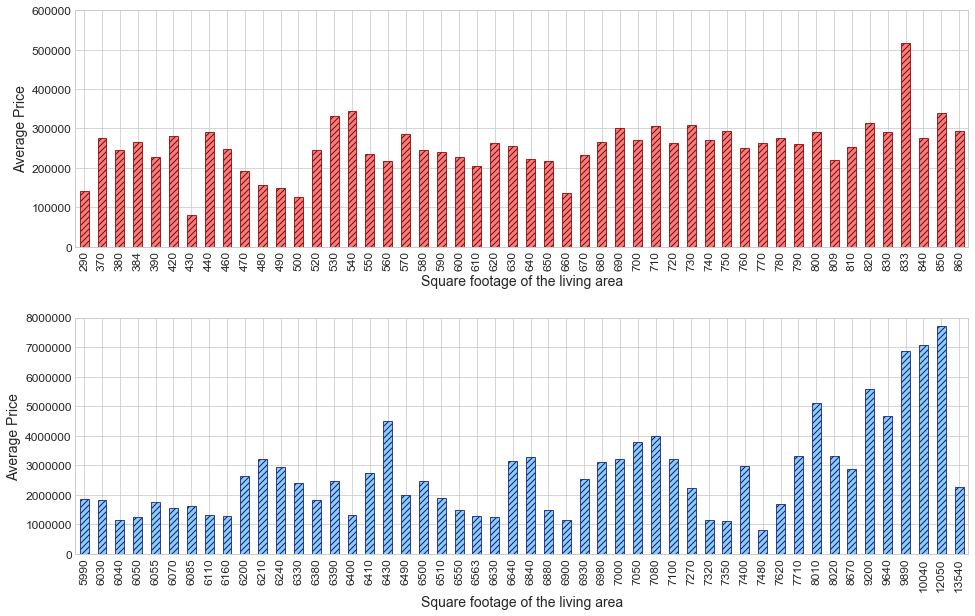

In [20]:
# sns.set(color_codes=True)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 10), sharex=False)
Group.head(50).plot.bar(rot=90,ax=ax[0], legend=False, color = 'Lightcoral', edgecolor='DarkRed', hatch = '////')
_ = ax[0].set_ylabel('Average Price')
_ = ax[0].set_xlabel(Dict['sqft_living'])
_ = ax[0].set_ylim([0,6e5])

Group.tail(50).plot.bar(rot=90,ax=ax[1], legend=False, color = 'LightSkyBlue', edgecolor='midnightblue', hatch = '////')
_ = ax[1].set_ylabel('Average Price')
_ = ax[1].set_xlabel(Dict['sqft_living'])
_ = ax[1].set_ylim([0,8e6])

plt.subplots_adjust(hspace=0.3)

## Year 2014: Average Price (Lot Space)

In [21]:
Group = pd.DataFrame(Y14.groupby(['sqft_lot'])['price'].mean())
Group.columns = ['Average Price']
Group.sort_values(by='sqft_lot', inplace = True)
Top = 10
print(Back.CYAN +'Top %i entries:' % Top)
display(Group.head(Top).T)
print(Back.CYAN +'Bottom %i entries:' % Top)
display(Group.tail(Top).T)

Top 10 entries:


sqft_lot            520       635       638       676       681       696  \
Average Price  700000.0  256950.0  516500.0  304000.0  339950.0  345000.0   

sqft_lot            704       705       711       713  
Average Price  742000.0  315000.0  325000.0  700000.0

Bottom 10 entries:


sqft_lot        501376    505166    507038    533610    577605    641203   \
Average Price  800000.0  999000.0  428000.0  375000.0  700000.0  849900.0   

sqft_lot        843309    982278    982998    1074218  
Average Price  550000.0  790000.0  998000.0  542500.0

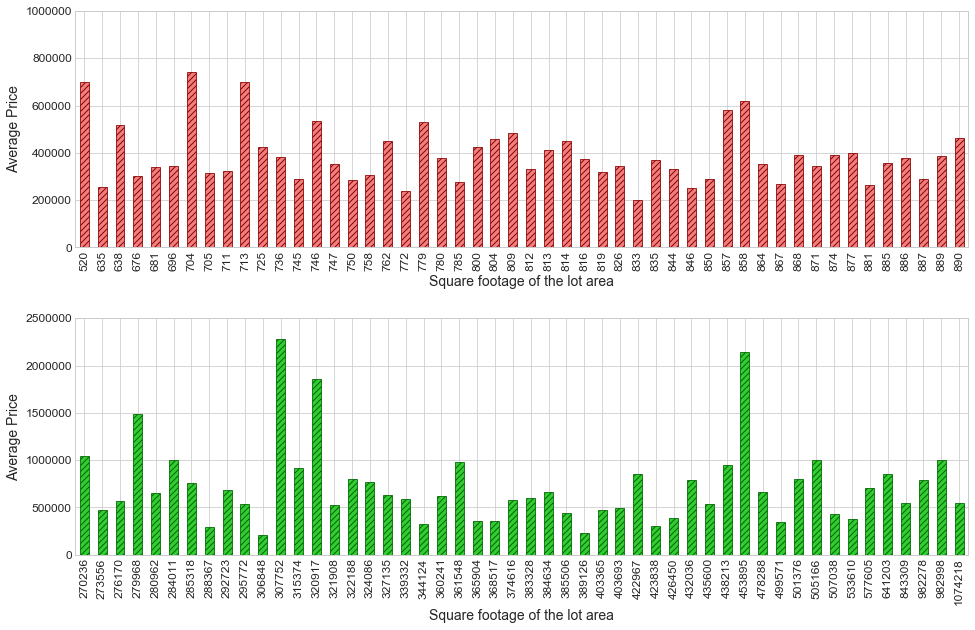

In [22]:
# sns.set(color_codes=True)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 10), sharex=False)
Group.head(50).plot.bar(rot=90,ax=ax[0], legend=False, color = 'Lightcoral', edgecolor='DarkRed', hatch = '////')
_ = ax[0].set_ylabel('Average Price')
_ = ax[0].set_xlabel(Dict['sqft_lot'])
_ = ax[0].set_ylim([0,1e6])

Group.tail(50).plot.bar(rot=90,ax=ax[1], legend=False, color = 'limegreen', edgecolor='darkgreen', hatch = '////')
_ = ax[1].set_ylabel('Average Price')
_ = ax[1].set_xlabel(Dict['sqft_lot'])
_ = ax[1].set_ylim([0,2.5e6])

plt.subplots_adjust(hspace=0.3)

## Year 2014: Average Price (Bedrooms and Bathrooms)

In [23]:
Group = pd.DataFrame(Y14.groupby(['bedrooms'])['price'].mean())
Group.columns = ['Average Price']
Group.sort_values(by='bedrooms', inplace = True)
Top = 10
print(Back.CYAN +'Top %i entries:' % Top)
display(Group.head(Top).T)

Top 10 entries:


bedrooms                   0              1              2              3  \
Average Price  458733.333333  310022.246377  398530.679501  463237.913188   

bedrooms                   4              5          6             7  \
Average Price  636044.166596  780172.116559  837156.25  1.016377e+06   

bedrooms                  8              9  
Average Price  1.208455e+06  776666.333333

In [24]:
Group1 = pd.DataFrame(Y14.groupby(['bathrooms'])['price'].mean())
Group1.columns = ['Average Price']
Group1.sort_values(by='bathrooms', inplace = True)
Top = 10
print(Back.CYAN +'Top %i entries:' % Top)
display(Group1.head(Top).T)

Top 10 entries:


bathrooms               0.00           0.50         0.75           1.00  \
Average Price  588608.333333  280166.666667  301382.3125  339125.404382   

bathrooms               1.25           1.50           1.75           2.00  \
Average Price  563778.571429  404445.058824  451242.542192  457921.780045   

bathrooms               2.25           2.50  
Average Price  533250.092888  551425.227717

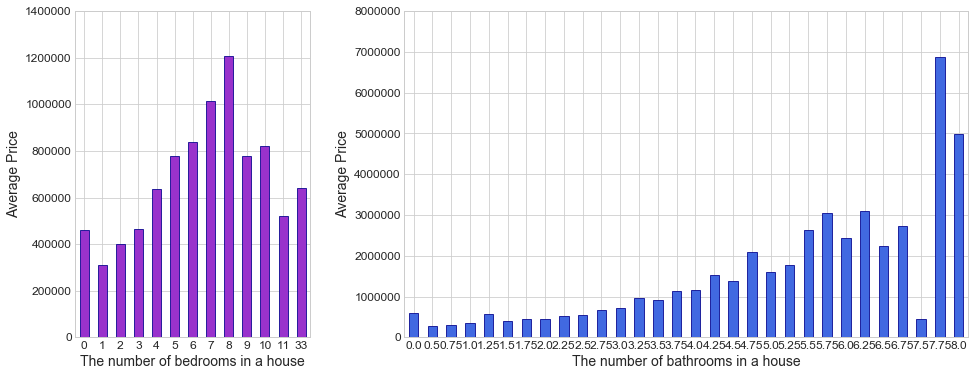

In [25]:
# fig, ax = plt.subplots(figsize=(16, 6), sharex=False)
fig = plt.figure(figsize=(16, 6), constrained_layout=True)
gs = fig.add_gridspec(1, 3)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1:])


Group.plot.bar(rot=0,ax=ax1, legend=False, color = 'darkorchid', edgecolor = 'darkblue')
_ = ax1.set_ylabel('Average Price')
_ = ax1.set_xlabel(Dict['bedrooms'])
_ = ax1.set_ylim([0,1.4e6])

Group1.plot.bar(rot=0,ax=ax2, legend=False, color = 'royalblue', edgecolor = 'darkblue')
_ = ax2.set_ylabel('Average Price')
_ = ax2.set_xlabel(Dict['bathrooms'])
_ = ax2.set_ylim([0,8e6])

plt.subplots_adjust(wspace=0.4)

## Year 2014: Average Price (Grade and Condition)

In [26]:
Group = pd.DataFrame(Y14.groupby(['grade'])['price'].mean())
Group.columns = ['Average Price']
Group.sort_values(by='grade', inplace = True)
Group.T

grade                1         3              4              5   \
Average Price  142000.0  280000.0  217947.368421  236145.785714   

grade                     6              7              8              9   \
Average Price  294992.814955  397543.909907  539899.837884  765318.836433   

grade                    10            11            12         13  
Average Price  1.057741e+06  1.491021e+06  2.178405e+06  4099100.0

In [27]:
Group1 = pd.DataFrame(Y14.groupby(['condition'])['price'].mean())
Group1.columns = ['Average Price']
Group1.sort_values(by='condition', inplace = True)
Group1.T

condition                  1              2              3              4  \
Average Price  277944.736842  311687.647059  539900.640987  520966.653935   

condition                 5  
Average Price  611183.77856

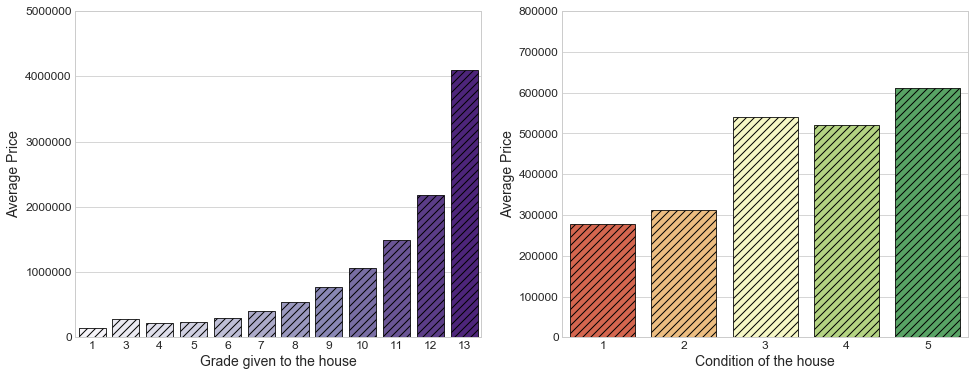

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharex=False)
_ = sns.barplot(ax = ax[0], x="grade", y="Average Price", palette='Purples',
                edgecolor='k',  hatch="///", data=Group.reset_index(drop = False))
_ = ax[0].set_ylabel('Average Price')
_ = ax[0].set_xlabel(Dict['grade'])
_ = ax[0].set_ylim([0,5e6])

_ = sns.barplot(ax = ax[1], x="condition", y="Average Price", palette='RdYlGn',
                edgecolor='k',  hatch="///", data=Group1.reset_index(drop = False))
_ = ax[1].set_ylabel('Average Price')
_ = ax[1].set_xlabel(Dict['condition'])
_ = ax[1].set_ylim([0,8e5])

plt.subplots_adjust(hspace=0.1)

## Year 2014: Price and Location

In [29]:
geometry = [Point(xy) for xy in zip(Y14.long, Y14.lat)]
crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(Y14,crs = crs, geometry = geometry)
Temp = geo_df[['price','geometry']]

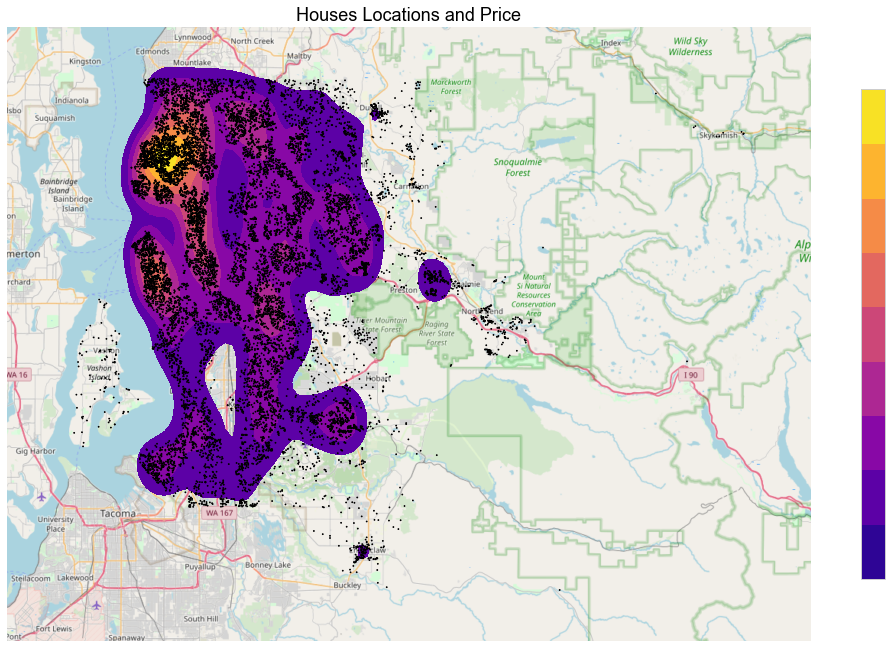

In [30]:
ax = gplt.kdeplot(Temp, cmap='plasma', projection=gcrs.WebMercator(), figsize=(18, 18), shade=True,
                  cbar =True, cbar_kws={'ticks' : [ np.min(Temp.price), np.max(Temp.price) ], 'shrink': .5})
gplt.pointplot(Temp, s=1, color='black', ax=ax)
gplt.webmap(Temp, ax=ax)
_ = ax.set_title('Houses Locations and Price', fontsize=18)

## Year 2014: The top ten expensive houses

In [31]:
Temp = Y14.sort_values(by='price', ascending=False).reset_index(drop =True)
Top3 = Temp[0:10]

m = folium.Map([Top3.lat.mean(), Top3.long.mean()], zoom_start = 10.5)

for i in range(len(Top3)):
    Inp=Top3[i:(i+1)]
    St = '(Value:' + str(Inp.price.values[0])+', Grade:' + str(Inp.grade.values[0]) + ')'
    folium.Marker(location=[Inp.lat.values[0], Inp.long.values[0]], popup = St, 
                  icon=folium.Icon(color='blue',icon='building', prefix='fa') ).add_to(m)
m

Now,

In [32]:
Y15.head().style.hide_index()

## Year 2015: The relationship between various attributes and the price

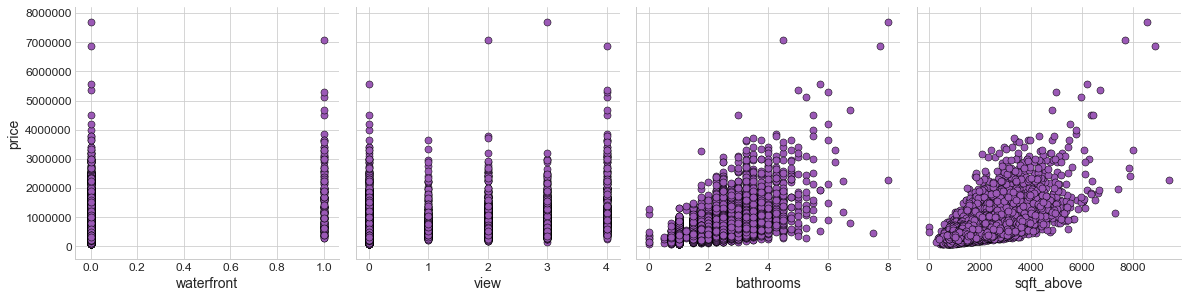

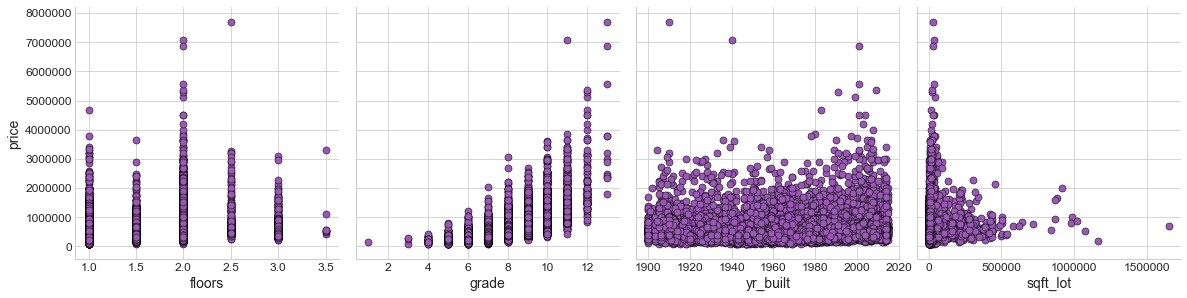

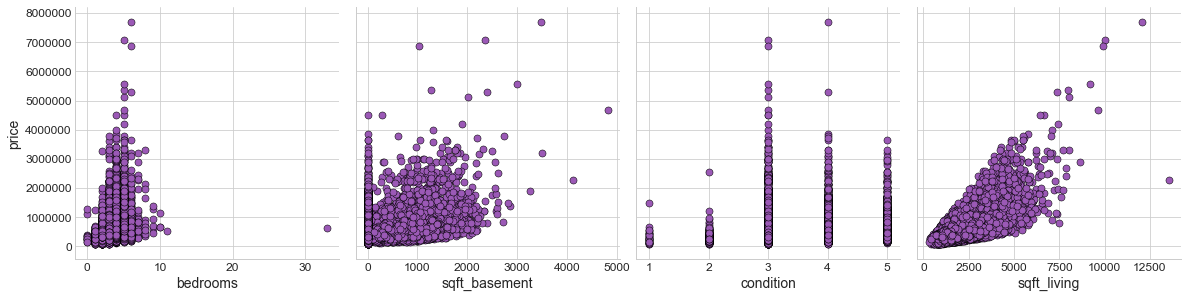

In [33]:
Temp = Y15.iloc[:, 3 : 17]
mylist = list(set(Temp)-set(['price','yr_renovated']))
ind = np.arange(0,len(mylist), 4).tolist()
ind.append(len(mylist))

for i in range(len(ind)-1):
    _ = sns.pairplot(data= Data, y_vars = ['price'], x_vars = mylist[ind[i]:ind[i+1]], size=4,
                 height=4, plot_kws=dict(s=50, color='#9b59b6', edgecolor="k", linewidth=0.5),diag_kws=dict(shade=True))

## Year 2015: Average Price (Living Space)

In [34]:
Group = pd.DataFrame(Y15.groupby(['sqft_living'])['price'].mean())
Group.columns = ['Average Price']
Group.sort_values(by='sqft_living', inplace = True)
Top = 10
print(Back.CYAN +'Top %i entries:' % Top)
display(Group.head(Top).T)
print(Back.CYAN +'Bottom %i entries:' % Top)
display(Group.tail(Top).T)

Top 10 entries:


sqft_living         390       410       420       470       520       540  \
Average Price  245000.0  325000.0  229050.0  156000.0  286000.0  425000.0   

sqft_living        560      570       580       590  
Average Price  90000.0  89950.0  164500.0  240000.0

Bottom 10 entries:


sqft_living         6810      7120       7220       7390       7420  \
Average Price  2479000.0  900000.0  1940000.0  5300000.0  1950000.0   

sqft_living         7440       7730       7850       7880       8000  
Average Price  4208000.0  1920000.0  2700000.0  2415000.0  5350000.0

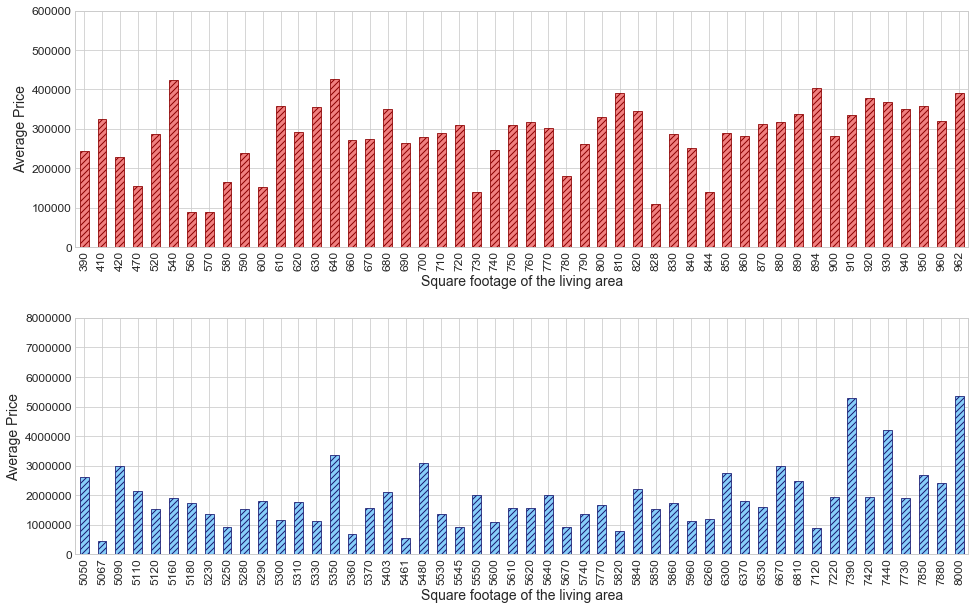

In [35]:
# sns.set(color_codes=True)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 10), sharex=False)
Group.head(50).plot.bar(rot=90,ax=ax[0], legend=False, color = 'Lightcoral', edgecolor='DarkRed', hatch = '////')
_ = ax[0].set_ylabel('Average Price')
_ = ax[0].set_xlabel(Dict['sqft_living'])
_ = ax[0].set_ylim([0,6e5])

Group.tail(50).plot.bar(rot=90,ax=ax[1], legend=False, color = 'LightSkyBlue', edgecolor='midnightblue', hatch = '////')
_ = ax[1].set_ylabel('Average Price')
_ = ax[1].set_xlabel(Dict['sqft_living'])
_ = ax[1].set_ylim([0,8e6])

plt.subplots_adjust(hspace=0.3)

## Year 2015: Average Price (Lot Space)

In [36]:
Group = pd.DataFrame(Y15.groupby(['sqft_lot'])['price'].mean())
Group.columns = ['Average Price']
Group.sort_values(by='sqft_lot', inplace = True)
Top = 10
print(Back.CYAN +'Top %i entries:' % Top)
display(Group.head(Top).T)
print(Back.CYAN +'Bottom %i entries:' % Top)
display(Group.tail(Top).T)

Top 10 entries:


sqft_lot            572       600        609       649       651       675  \
Average Price  250000.0  367500.0  1234570.0  259950.0  405000.0  420000.0   

sqft_lot            683       690       698       700  
Average Price  335000.0  610000.0  346100.0  340000.0

Bottom 10 entries:


sqft_lot        503989    542322    623779    715690     871200     881654   \
Average Price  920000.0  425000.0  700000.0  750000.0  1268750.0  1650000.0   

sqft_lot         920423    1024068   1164794   1651359  
Average Price  1998000.0  855000.0  190000.0  700000.0

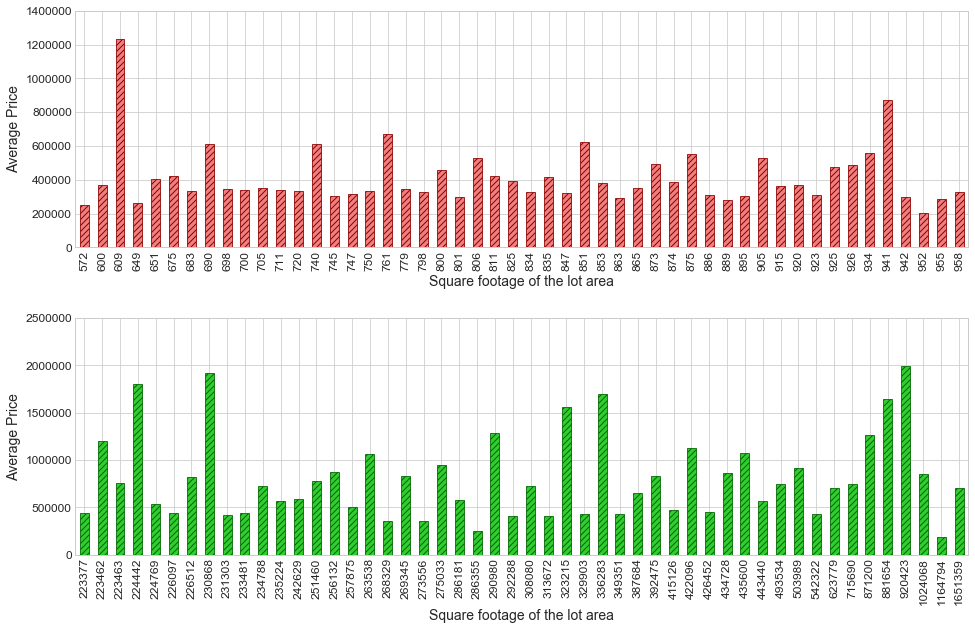

In [37]:
# sns.set(color_codes=True)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 10), sharex=False)
Group.head(50).plot.bar(rot=90,ax=ax[0], legend=False, color = 'Lightcoral', edgecolor='DarkRed', hatch = '////')
_ = ax[0].set_ylabel('Average Price')
_ = ax[0].set_xlabel(Dict['sqft_lot'])
_ = ax[0].set_ylim([0,1.4e6])

Group.tail(50).plot.bar(rot=90,ax=ax[1], legend=False, color = 'limegreen', edgecolor='darkgreen', hatch = '////')
_ = ax[1].set_ylabel('Average Price')
_ = ax[1].set_xlabel(Dict['sqft_lot'])
_ = ax[1].set_ylim([0,2.5e6])

plt.subplots_adjust(hspace=0.3)

## Year 2015: Average Price (Bedrooms and Bathrooms)

In [38]:
Group = pd.DataFrame(Y15.groupby(['bedrooms'])['price'].mean())
Group.columns = ['Average Price']
Group.sort_values(by='bedrooms', inplace = True)
Top = 10
print(Back.CYAN +'Top %i entries:' % Top)
display(Group.head(Top).T)

Top 10 entries:


bedrooms              0              1              2              3  \
Average Price  298737.5  334883.016393  407093.918122  472395.659091   

bedrooms                   4              5              6         7  \
Average Price  634052.078313  799962.053846  804188.677083  706712.5   

bedrooms              8             9  
Average Price  536500.0  1.011333e+06

In [39]:
Group1 = pd.DataFrame(Y15.groupby(['bathrooms'])['price'].mean())
Group1.columns = ['Average Price']
Group1.sort_values(by='bathrooms', inplace = True)
Top = 10
print(Back.CYAN +'Top %i entries:' % Top)
display(Group1.head(Top).T)

Top 10 entries:


bathrooms          0.00      0.50           0.75           1.00      1.25  \
Average Price  237487.5  109000.0  280797.958333  361846.552161  822250.0   

bathrooms               1.50           1.75          2.00           2.25  \
Average Price  419229.872117  462536.694726  457819.83855  534555.647235   

bathrooms           2.50  
Average Price  558296.68

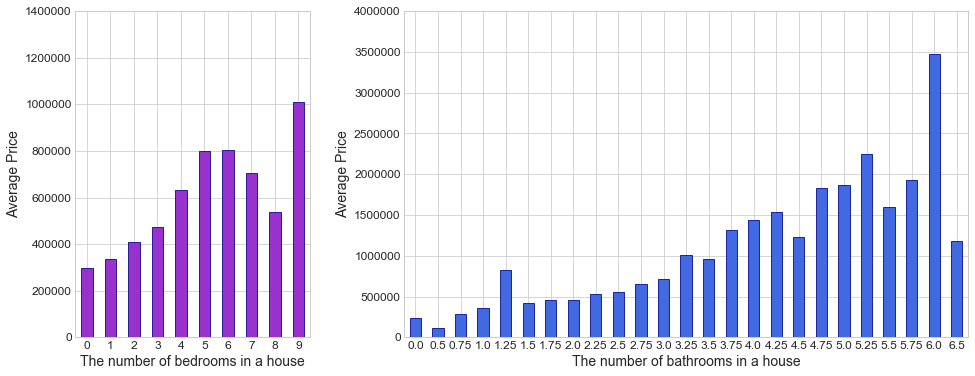

In [40]:
# fig, ax = plt.subplots(figsize=(16, 6), sharex=False)
fig = plt.figure(figsize=(16, 6), constrained_layout=True)
gs = fig.add_gridspec(1, 3)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1:])


Group.plot.bar(rot=0,ax=ax1, legend=False, color = 'darkorchid', edgecolor = 'darkblue')
_ = ax1.set_ylabel('Average Price')
_ = ax1.set_xlabel(Dict['bedrooms'])
_ = ax1.set_ylim([0,1.4e6])

Group1.plot.bar(rot=0,ax=ax2, legend=False, color = 'royalblue', edgecolor = 'darkblue')
_ = ax2.set_ylabel('Average Price')
_ = ax2.set_xlabel(Dict['bathrooms'])
_ = ax2.set_ylim([0,4e6])

plt.subplots_adjust(wspace=0.4)

## Year 2015: Average Price (Grade and Condition)

In [41]:
Group = pd.DataFrame(Y15.groupby(['grade'])['price'].mean())
Group.columns = ['Average Price']
Group.sort_values(by='grade', inplace = True)
Group.T

grade                3         4              5              6   \
Average Price  168500.0  207605.0  270185.795455  314764.333333   

grade                     7              8              9             10  \
Average Price  412829.336931  549188.778123  792546.566709  1.105954e+06   

grade                    11            12            13  
Average Price  1.510537e+06  2.213360e+06  2.411333e+06

In [42]:
Group1 = pd.DataFrame(Y15.groupby(['condition'])['price'].mean())
Group1.columns = ['Average Price']
Group1.sort_values(by='condition', inplace = True)
Group1.T

condition             1              2              3              4  \
Average Price  432000.0  350017.842857  546243.233091  521702.456208   

condition                  5  
Average Price  616147.283688

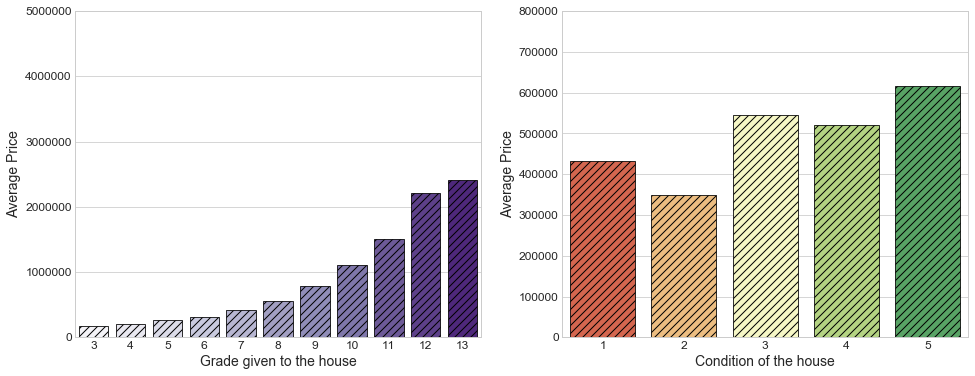

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharex=False)
_ = sns.barplot(ax = ax[0], x="grade", y="Average Price", palette='Purples',
                edgecolor='k',  hatch="///", data=Group.reset_index(drop = False))
_ = ax[0].set_ylabel('Average Price')
_ = ax[0].set_xlabel(Dict['grade'])
_ = ax[0].set_ylim([0,5e6])

_ = sns.barplot(ax = ax[1], x="condition", y="Average Price", palette='RdYlGn',
                edgecolor='k',  hatch="///", data=Group1.reset_index(drop = False))
_ = ax[1].set_ylabel('Average Price')
_ = ax[1].set_xlabel(Dict['condition'])
_ = ax[1].set_ylim([0,8e5])

plt.subplots_adjust(hspace=0.1)

## Year 2015: Price and Location

In [44]:
geometry = [Point(xy) for xy in zip(Y15.long, Y14.lat)]
crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(Y15,crs = crs, geometry = geometry)
Temp = geo_df[['price','geometry']]

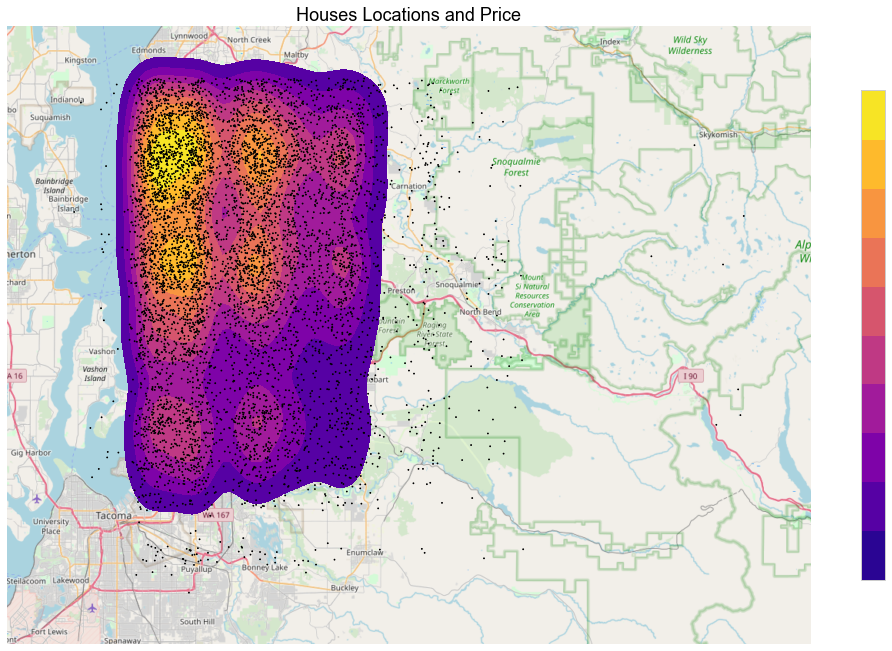

In [45]:
ax = gplt.kdeplot(Temp, cmap='plasma', projection=gcrs.WebMercator(), figsize=(18, 18), shade=True,
                  cbar =True, cbar_kws={'ticks' : [ np.min(Temp.price), np.max(Temp.price) ], 'shrink': .5})
gplt.pointplot(Temp, s=1, color='black', ax=ax)
gplt.webmap(Temp, ax=ax)
_ = ax.set_title('Houses Locations and Price', fontsize=18)

## Year 2015: The top ten expensive houses

In [46]:
Temp = Y15.sort_values(by='price', ascending=False).reset_index(drop =True)
Top3 = Temp[0:10]

m = folium.Map([Top3.lat.mean(), Top3.long.mean()], zoom_start = 11)

for i in range(len(Top3)):
    Inp=Top3[i:(i+1)]
    St = '(Value:' + str(Inp.price.values[0])+', Grade:' + str(Inp.grade.values[0]) + ')'
    folium.Marker(location=[Inp.lat.values[0], Inp.long.values[0]], popup = St, 
                  icon=folium.Icon(color='blue',icon='building', prefix='fa') ).add_to(m)
m

# Predictions

In this section, we implement several well-known algorithms and compare them in terms of accuracy.

In [47]:
Set = pd.get_dummies(Data['year'])
Set = pd.concat([Data, Set], axis = 1)
Set = Set.drop(columns = ['id','date','year','lat','long','zipcode'])
Set.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7      1180.0              0      1955             0   
1     0          3      7      2170.0            400      1951          1991   
2     0          3      6       770.0              0      1933             0   
3     0          5      7      1050.0            910      1965             0   
4     0          3      8      1680.0              0      1987             0   

   sqft_living15  sqft_lot15  2014  2015  
0           1340        5650     1     0  
1           1690        7639     1     0  
2           2720        8062     0     1  
3           1360        5000     1     0  
4           1800        7503     0     1

## Train and Test Sets

In [48]:
X = Set.drop(columns = ['price'])
y = Set.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10,random_state =2)

In [49]:
pd.DataFrame(data={'Set':['X_train','X_test','y_train','y_test'],
             'Shape':[X_train.shape, X_test.shape, y_train.shape, y_test.shape]}).style.hide_index()

In the next section, we use the following function for plotting.

In [50]:
# sns.set(color_codes=True)

def Plot_Reg_Results(Expected, Predicted, Reg):
    fig, ax = plt.subplots(figsize=(10,5))
    _ = ax.scatter(Expected/(1e6), Predicted/(1e6), color = 'mediumorchid', edgecolor = 'purple')
    N = int(np.max(np.ceil([np.max(Expected/(1e6)), np.max(Predicted/(1e6))])))
    _ = ax.plot([0, N], [0, N], '--k')
    _ = ax.set_title('Using %s' % Reg, fontsize=14)
    _ = ax.set_xlabel('True price ($1 \\times 10^{6}$)', fontsize=14)
    _ = ax.set_ylabel('Predicted price ($1 \\times 10^{6}$)', fontsize=14)
    _ = ax.set_xlim([0, N])
    _ = ax.set_ylim([0, N])

    plt.tight_layout()

Moreover, we can create a table for later comparisons.



In [51]:
Results = pd.DataFrame(data={'Regression': ['Gradient Boosted Tree'],'Score':'', 'MSE':'', 'Variance score':''})
Results = Results.set_index('Regression')

## Gradient Boosted Tree

Score          MSE Variance score
Regression                                                 
Gradient Boosted Tree  0.791868  3.17922e+10       0.782432

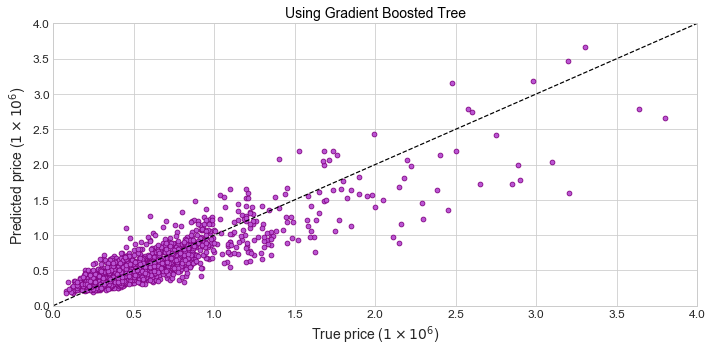

In [52]:
Reg = 'Gradient Boosted Tree'
clf = GradientBoostingRegressor()
_ = clf.fit(X_train, y_train)

# Predicted Values
Predicted = clf.predict(X_test)
# Expected Values
Expected = y_test

# the Plot
Plot_Reg_Results(Expected, Predicted,Reg)

# the table
Results.loc[Reg,:] = [clf.score(X, y), mean_squared_error(Expected, Predicted),
                                      r2_score(Expected, Predicted)]
Results

## Decision Tree Regression

Score          MSE Variance score
Regression                                                    
Gradient Boosted Tree     0.791868  3.17922e+10       0.782432
Decision Tree Regression  0.953337   6.2763e+10       0.570485

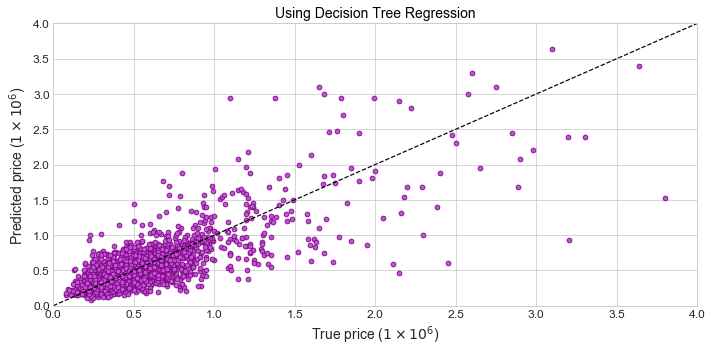

In [53]:
Reg = 'Decision Tree Regression'
clf = DecisionTreeRegressor()
_ = clf.fit(X_train, y_train)

# Predicted Values
Predicted = clf.predict(X_test)
# Expected Values
Expected = y_test

# the Plot
Plot_Reg_Results(Expected, Predicted,Reg)

# the table
Results.loc[Reg,:] = [clf.score(X, y), mean_squared_error(Expected, Predicted),
                                      r2_score(Expected, Predicted)]
Results

## Conclusions

We can see that the highest score is from

In [54]:
Results[Results.Score == Results.Score.max()].iloc[:,0:1]

Score
Regression                        
Decision Tree Regression  0.953337

However, this score can be improve for more accurate predictions. 

Thus, we have a model that can predict the price of a house for given input values. For example,

In [55]:
Example = Set.iloc[0:1,1:]
Example.bedrooms = 4
Example.sqft_living = 600
Example.sqft_living = 2000
Example.floors = 2
Example.sqft_above = 1000
Example.yr_built = 1995
Example

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         4        1.0         2000      5650       2           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1000              0      1995             0   

   sqft_living15  sqft_lot15  2014  2015  
0           1340        5650     1     0

is estimated to have the following price.

In [56]:
Price = clf.predict(Example)
Price[0]

163000.0

***